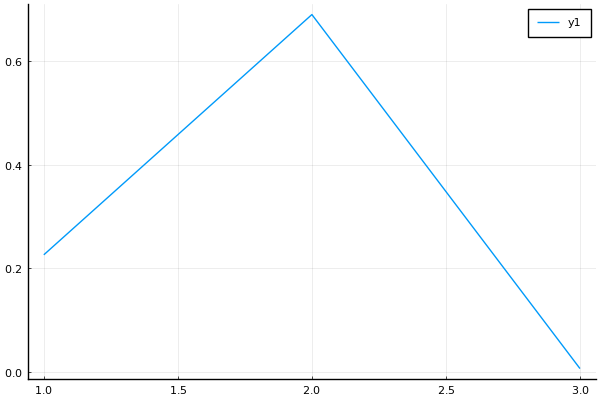

In [7]:
using Plots; pyplot()
using Blink, Interact
using ApproxFun
plot(rand(3))

In [21]:
function chebpts(N)
    return cos.((0:N)*pi/N)
end
chebpts(5)

6-element Array{Float64,1}:
  1.0
  0.8090169943749475
  0.30901699437494745
 -0.30901699437494734
 -0.8090169943749473
 -1.0

In [22]:
"""
Compute and return the Chebyshev differentiation matrix.
Based on Trefethen, Spectral Methods in Matlab, page 54, cheb.m

function [D,x] = cheb(N)
if N==O, D=O; x=1; return, end
x = cos(pi*(0:N)/N)';
c = [2; ones(N-1,1); 2].*(-1)."(O:N)'; X = repmat(x,1,N+1);
dX = X-X';
D = (c*(1./c)')./(dX+(eye(N+1)));
D = D - diag(sum(D'));
"""    

using LinearAlgebra
function chebdiff(N)
    if N==0
        D=zeros(1,1)
        x=ones(1.)
    else
        x = chebpts(N)
        c = [2; ones(N-1); 2] .* (-1).^(0:N)
        X = repeat(x,outer=[1,N+1])
        dX = X - X'
        D = (c*(1 ./ c)')./(dX + I)
        D = D - diagm(vec(sum(D,dims=2)))
    end
    return D,x
end
chebdiff(5)

([8.5 -10.472135954999581 … 1.105572809000084 -0.5; 2.6180339887498953 -1.170820393249937 … -0.6180339887498948 0.276393202250021; … ; -0.276393202250021 0.6180339887498948 … 1.1708203932499357 -2.6180339887498936; 0.5 -1.105572809000084 … 10.472135954999574 -8.499999999999995], [1.0, 0.8090169943749475, 0.30901699437494745, -0.30901699437494734, -0.8090169943749473, -1.0])

In [25]:
chebdiff(2)[1]

3×3 Array{Float64,2}:
  1.5  -2.0   0.5
  0.5   0.0  -0.5
 -0.5   2.0  -1.5

In [26]:
w = Window()

Window(4, Electron(Process(`/Users/dgleich/.julia/packages/Blink/u1xcH/deps/Julia.app/Contents/MacOS/Julia /Users/dgleich/.julia/packages/Blink/u1xcH/src/AtomShell/main.js port 6897`, ProcessRunning), Sockets.TCPSocket(RawFD(0x0000003f) active, 0 bytes waiting), Dict{String,Any}("callback" => Blink.var"#1#2"())), Page(4, WebSocket(server, CONNECTED), Dict{String,Any}("webio" => Blink.AtomShell.var"#24#25"{Blink.AtomShell.WebIOBlinkComm}(Blink.AtomShell.WebIOBlinkComm(Window(#= circular reference @-5 =#))),"callback" => Blink.var"#1#2"()), Distributed.Future(1, 1, 4, Some(true))), Task (done) @0x00000001070ae650)

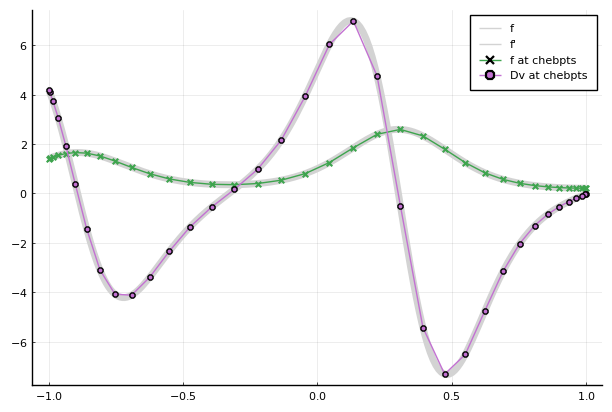

Page(4, WebSocket(server, CONNECTED), Dict{String,Any}("webio" => Blink.AtomShell.var"#24#25"{Blink.AtomShell.WebIOBlinkComm}(Blink.AtomShell.WebIOBlinkComm(Window(4, Electron(Process(`/Users/dgleich/.julia/packages/Blink/u1xcH/deps/Julia.app/Contents/MacOS/Julia /Users/dgleich/.julia/packages/Blink/u1xcH/src/AtomShell/main.js port 6897`, ProcessRunning), Sockets.TCPSocket(RawFD(0x0000003f) active, 0 bytes waiting), Dict{String,Any}("callback" => Blink.var"#1#2"())), Page(#= circular reference @-5 =#), Task (done) @0x00000001070ae650))),"callback" => Blink.var"#1#2"()), Distributed.Future(1, 1, 4, Some(true)))

In [27]:
f(x) = exp.(sin.(5 .* x)).*cos.(x)
af = Fun(f,-1..1)
ui = @manipulate for N=20:50
    x = chebpts(N)
    D = chebdiff(N)[1]
    v = f(x)
    plot(af,linewidth=5.,color=colorant"lightgrey", label="f")
    plot!(af',linewidth=5.,color=colorant"lightgrey", label="f'")
    plot!(x,v,marker=:x,label="f at chebpts")
    plot!(x,D*v,marker=:o,label="Dv at chebpts")
end
body!(w,ui)

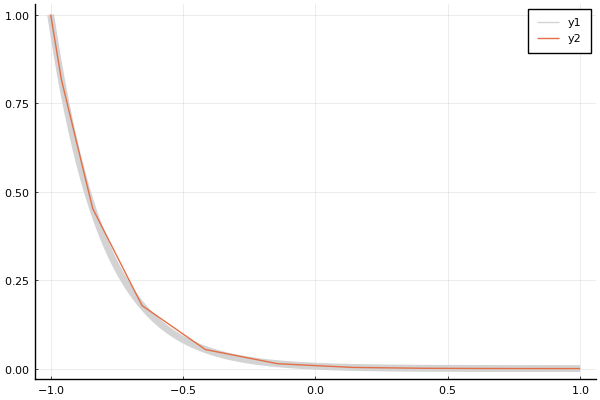

In [33]:
a = -5;
y0 = 1.
N = 11
D,x = chebdiff(N)
u = zeros(N+1)
D1 = D[1:end-1,1:end-1]
d0 = D[1:end-1,end]
u1 = (D1-a*I) \(-y0*d0)
u[end] = y0
u[1:end-1] = u1
plot(Fun(x -> exp(a*(x+1))),linewidth=5.,color=colorant"lightgrey")
plot!(x,u)


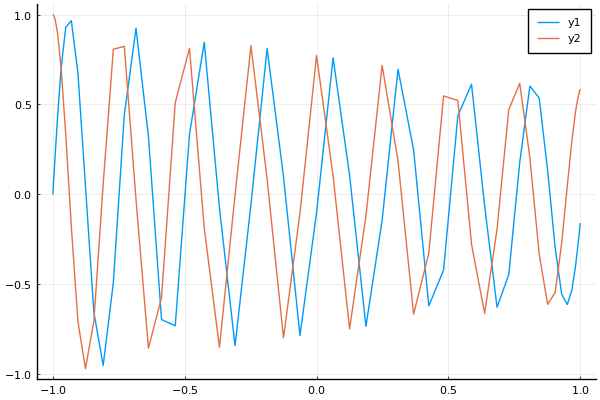

In [24]:
A = 25*[-0.01 1; -1 -0.01]
y0 = [0.;1.]
N = 50
x = chebpts(N)
D = chebdiff(N)[1]
U = zeros(N+1,2)
D1 = D[1:end-1,1:end-1]
d0 = D[1:end-1,end]
u2 = (kron(I(2),D1)-kron(A,I(N)))\(-kron(y0,d0))
U[1:end-1,:] = u2
U[end,:] = y0
plot(x,U)

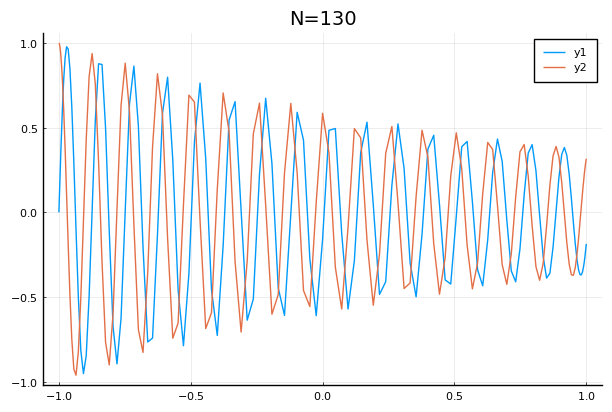

Page(4, WebSocket(server, CONNECTED), Dict{String,Any}("webio" => Blink.AtomShell.var"#24#25"{Blink.AtomShell.WebIOBlinkComm}(Blink.AtomShell.WebIOBlinkComm(Window(4, Electron(Process(`/Users/dgleich/.julia/packages/Blink/u1xcH/deps/Julia.app/Contents/MacOS/Julia /Users/dgleich/.julia/packages/Blink/u1xcH/src/AtomShell/main.js port 6897`, ProcessRunning), Sockets.TCPSocket(RawFD(0x0000003f) active, 0 bytes waiting), Dict{String,Any}("callback" => Blink.var"#1#2"())), Page(#= circular reference @-5 =#), Task (done) @0x00000001070ae650))),"callback" => Blink.var"#1#2"()), Distributed.Future(1, 1, 4, Some(true)))

Unexpected end of input
 ...when parsing byte with value '0'
Stacktrace:
 [1] error(::String) at ./error.jl:33
 [2] _error(::String, ::JSON.Parser.StreamingParserState{Sockets.TCPSocket}) at /Users/dgleich/.julia/packages/JSON/d89fA/src/Parser.jl:150
 [3] byteat(::JSON.Parser.StreamingParserState{Sockets.TCPSocket}) at /Users/dgleich/.julia/packages/JSON/d89fA/src/Parser.jl:59
 [4] current at /Users/dgleich/.julia/packages/JSON/d89fA/src/Parser.jl:72 [inlined]
 [5] chomp_space! at /Users/dgleich/.julia/packages/JSON/d89fA/src/Parser.jl:117 [inlined]
 [6] parse_value(::JSON.Parser.ParserContext{Dict{String,Any},Int64,true,nothing}, ::JSON.Parser.StreamingParserState{Sockets.TCPSocket}) at /Users/dgleich/.julia/packages/JSON/d89fA/src/Parser.jl:160
 [7] parse(::Sockets.TCPSocket; dicttype::Type{T} where T, inttype::Type{Int64}, allownan::Bool, null::Nothing) at /Users/dgleich/.julia/packages/JSON/d89fA/src/Parser.jl:494
 [8] parse at /Users/dgleich/.julia/packages/JSON/d89fA/src/Parser.j

In [34]:
using Printf
ui = @manipulate for N=10:250
    A = 50*[-0.01 1; -1 -0.01]
    y0 = [0.;1.]
    x = chebpts(N)
    D = chebdiff(N)[1]
    U = zeros(N+1,2)
    D1 = D[1:end-1,1:end-1]
    d0 = D[1:end-1,end]
    u2 = (kron(I(2),D1)-kron(A,I(N)))\(-kron(y0,d0))
    U[1:end-1,1:end] = u2
    U[end,:] = y0
    plot(x,U)
    plot!(title=@sprintf("N=%i",N))
end
body!(w,ui)

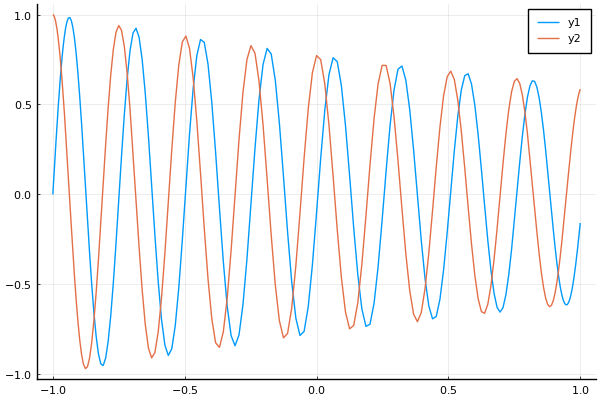

In [19]:
A = 25*[-0.01 1; -1 -0.01]
y0 = [0.;1.]
N = 200
x = chebpts(N)
D = chebdiff(N)[1]
U = zeros(N+1,2)
D1 = D[1:end-1,1:end-1]
d0 = D[1:end-1,end]
u2 = (kron(I(2),D1)-kron(A,I(N)))\(-kron(y0,d0))
U[1:end-1,:] = u2
U[end,:] = y0
plot(x,U)
#[U[1,:]; (expm((A/25)*50)*y0)' ]

In [20]:
using LinearAlgebra
N = 300
x = chebpts(N)
Ue = zeros(N+1,2)
A = [-0.01 1; -1 -0.01];
for i=1:N
    Ue[i,:] = (exp(A*(x[i]+1)*25)*y0)'
end
plot(x,sum(Ue.^2,dims=2))
A

2×2 Array{Float64,2}:
 -0.01   1.0
 -1.0   -0.01